In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import svm

In [3]:
df = pd.read_csv('/content/svm data.csv')

In [4]:
df.head()

,Unnamed: 0,feature1,feature2,label_y
0,0,8.660254,-5.00000,0
1,1,8.717792,-4.89899,0
2,2,8.773790,-4.79798,0
3,3,8.828277,-4.69697,0
4,4,8.881281,-4.59596,0


In [5]:
df = df.drop('Unnamed: 0',axis=1)

In [6]:
df.head()

,feature1,feature2,label_y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


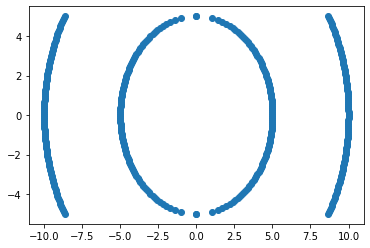

In [7]:
#viz
plt.scatter(df.feature1 , df.feature2)

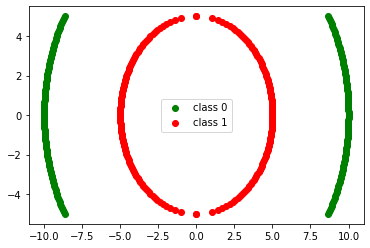

In [8]:
df1 = df[df.label_y == 0]
df2 = df[df.label_y == 1]

plt.scatter(df1.feature1 , df1.feature2, color='green', label='class 0')
plt.scatter(df2.feature1 , df2.feature2, color='red', label='class 1')

plt.legend()

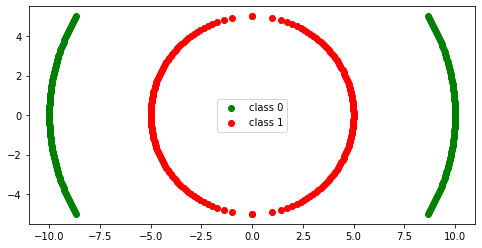

In [9]:
df1 = df[df.label_y == 0]
df2 = df[df.label_y == 1]

plt.figure(figsize=(8,4))
plt.scatter(df1.feature1 , df1.feature2, color='green', label='class 0')
plt.scatter(df2.feature1 , df2.feature2, color='red', label='class 1')

plt.legend()

In [10]:
from sklearn.model_selection import train_test_split

In [13]:
train,test= train_test_split(df, test_size=.30, random_state=100 )

In [14]:
train

,feature1,feature2,label_y
234,4.748549,-1.565657,1
45,9.989664,-0.454545,0
171,-9.761334,-2.171717,0
47,9.996811,-0.252525,0
265,4.748549,1.565657,1
...,...,...,...
343,-4.956705,0.656566,1
359,-4.907054,-0.959596,1
323,-4.223140,2.676768,1
280,3.938099,3.080808,1


In [15]:
test

,feature1,feature2,label_y
248,4.997704,-0.151515,1
318,-3.856946,3.181818,1
173,-9.714184,-2.373737,0
285,3.484482,3.585859,1
184,-9.373144,-3.484848,0
...,...,...,...
80,9.513602,3.080808,0
157,-9.971263,-0.757576,0
300,-0.000000,5.000000,1
31,9.823849,-1.868687,0


In [16]:
df.shape

(400, 3)

# Linear Kernel

In [17]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

In [18]:
svm.fit(train.drop('label_y', axis=1) , train.label_y)

SVC(kernel='linear')

In [19]:
svm.score(test.drop('label_y', axis=1) , test.label_y)

0.55

# Polynomial

In [20]:
df.head()

,feature1,feature2,label_y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [22]:
df['fe1_square'] = df['feature1'] ** 2
df['fe2_square'] = df['feature2'] ** 2

df['Fe1_Fe2'] = df['feature1'] * df['feature2']

In [23]:
df

,feature1,feature2,label_y,fe1_square,fe2_square,Fe1_Fe2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009
...,...,...,...,...,...,...
395,-1.969049,-4.59596,1,3.877155,21.122845,9.049671
396,-1.714198,-4.69697,1,2.938476,22.061524,8.051537
397,-1.406908,-4.79798,1,1.979390,23.020610,6.750316
398,-0.999949,-4.89899,1,0.999898,24.000102,4.898740


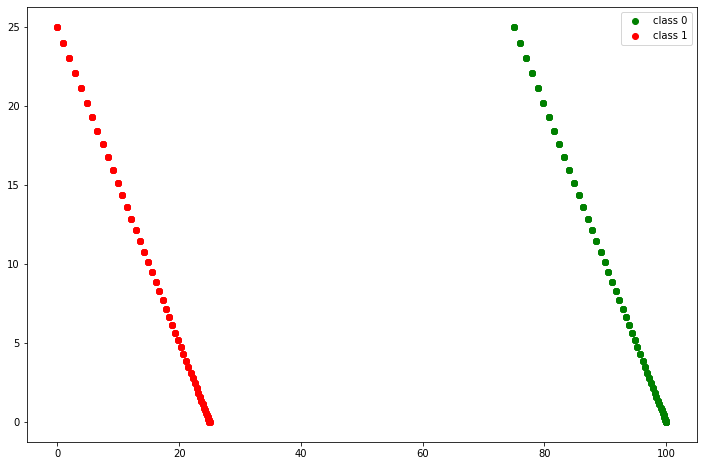

In [24]:
df1 = df[df.label_y == 0]
df2 = df[df.label_y == 1]

plt.figure(figsize=(12,8))
plt.scatter(df1.fe1_square , df1.fe2_square, color='green', label='class 0')
plt.scatter(df2.fe1_square , df2.fe2_square, color='red', label='class 1')

plt.legend()

In [25]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import plotly.express as px
px.scatter_3d(df , x='fe1_square' , y='fe2_square' , z='Fe1_Fe2',color='label_y')

In [27]:
x = df.drop('label_y', axis=1)

In [28]:
y = df['label_y']

In [29]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label_y, dtype: int64

In [30]:
x.head()

,feature1,feature2,fe1_square,fe2_square,Fe1_Fe2
0,8.660254,-5.00000,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,78.877155,21.122845,-40.818009


In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y , test_size=.30, random_state=100 )

In [32]:
xtrain

,feature1,feature2,fe1_square,fe2_square,Fe1_Fe2
234,4.748549,-1.565657,22.548720,2.451280,-7.434597
45,9.989664,-0.454545,99.793388,0.206612,-4.540756
171,-9.761334,-2.171717,95.283645,4.716355,21.198857
47,9.996811,-0.252525,99.936231,0.063769,-2.524447
265,4.748549,1.565657,22.548720,2.451280,7.434597
...,...,...,...,...,...
343,-4.956705,0.656566,24.568922,0.431078,-3.254402
359,-4.907054,-0.959596,24.079176,0.920824,4.708789
323,-4.223140,2.676768,17.834915,7.165085,-11.304366
280,3.938099,3.080808,15.508622,9.491378,12.132526


In [33]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

In [34]:
svm.fit(xtrain, ytrain)

SVC(kernel='linear')

In [35]:
svm.score(xtest, ytest)

1.0

In [36]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')

In [37]:
svm.fit(xtrain,ytrain)

SVC()

In [38]:
svm.score(xtest, ytest)

1.0

In [39]:
svm.predict([[-4.956705,0.656566,24.568922,0.431078,-3.254402]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



array([1])